# **TrackML : Data exploration** 

Imports
---

In [2]:
import os

import numpy as np
import pandas as pd

from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Load event
---

In [11]:
data_path = '../Data/train_100_events/'
event_prefix = 'event000001000'
hits, cells, particles, truth = load_event(os.path.join(data_path, event_prefix))

Hits info
---
The  x,y,z  global coordinates (in millimeters) of where the particles hit the detector surface

In [24]:
hits.info()
hits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120939 entries, 0 to 120938
Data columns (total 7 columns):
hit_id       120939 non-null int32
x            120939 non-null float32
y            120939 non-null float32
z            120939 non-null float32
volume_id    120939 non-null int32
layer_id     120939 non-null int32
module_id    120939 non-null int32
dtypes: float32(3), int32(4)
memory usage: 3.2 MB


,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


Hits plot
---
The colors represent different detector volumes.

### 1. Vertical Intersection ( x,y )

c:\users\danil\appdata\local\conda\conda\envs\trackml\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


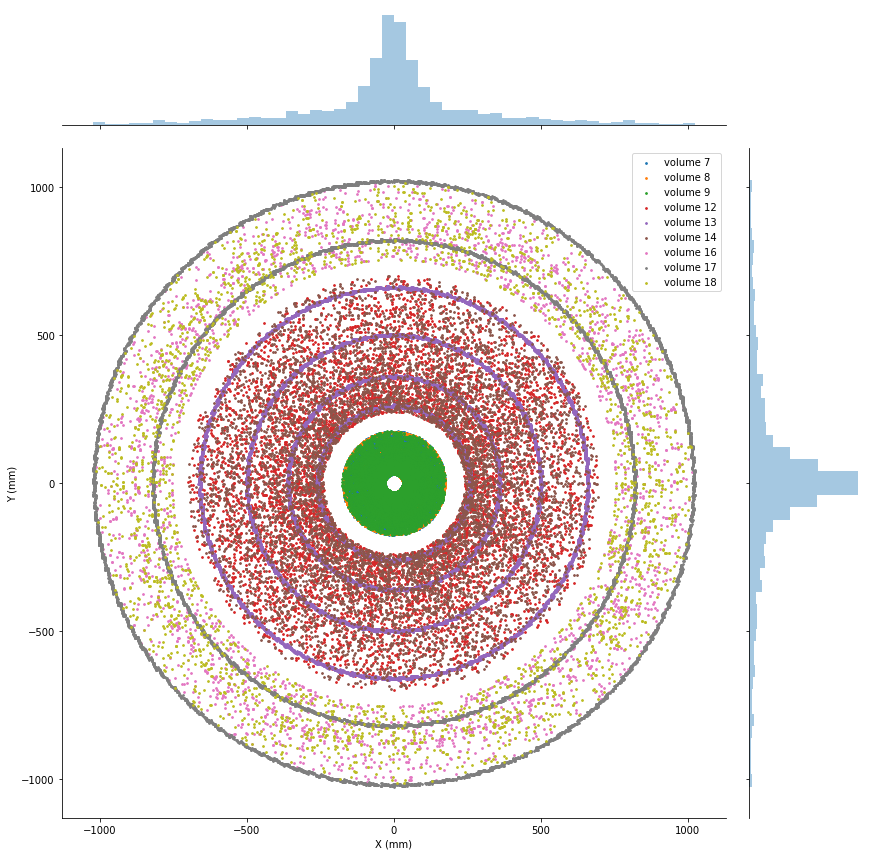

In [25]:
g = sns.jointplot(hits.x, hits.y,  s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

c:\users\danil\appdata\local\conda\conda\envs\trackml\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


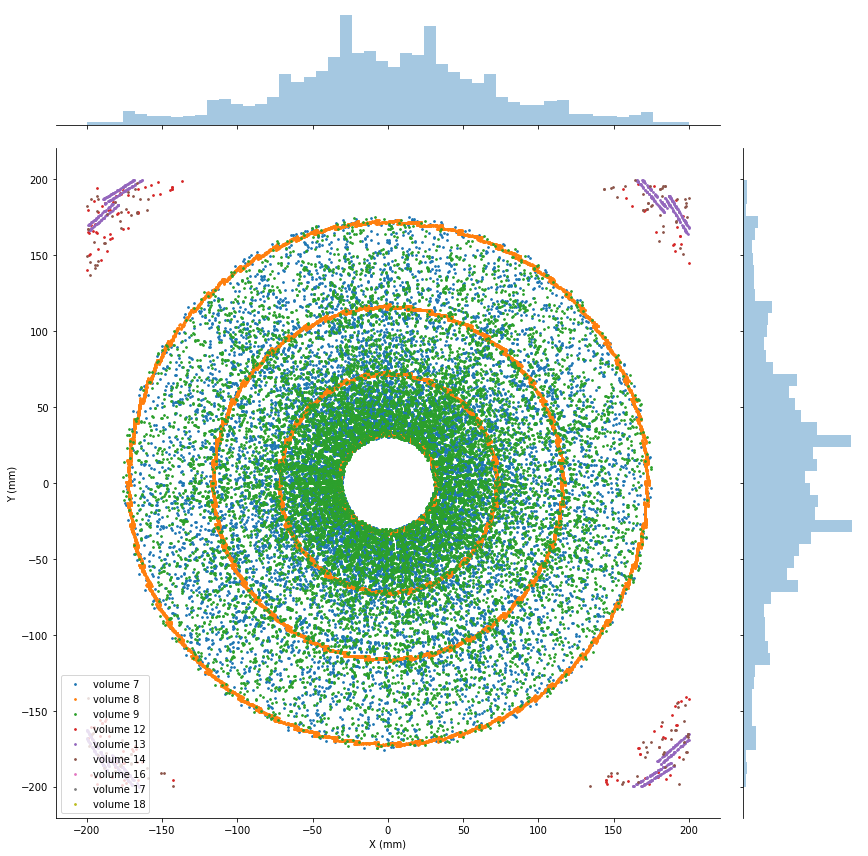

In [49]:
g = sns.jointplot( hits[hits.x.abs()<200].x, hits[hits.y.abs()<200].y, size=12, s=1)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    v = v[v.x.abs()<200]
    v = v[v.y.abs()<200]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

c:\users\danil\appdata\local\conda\conda\envs\trackml\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


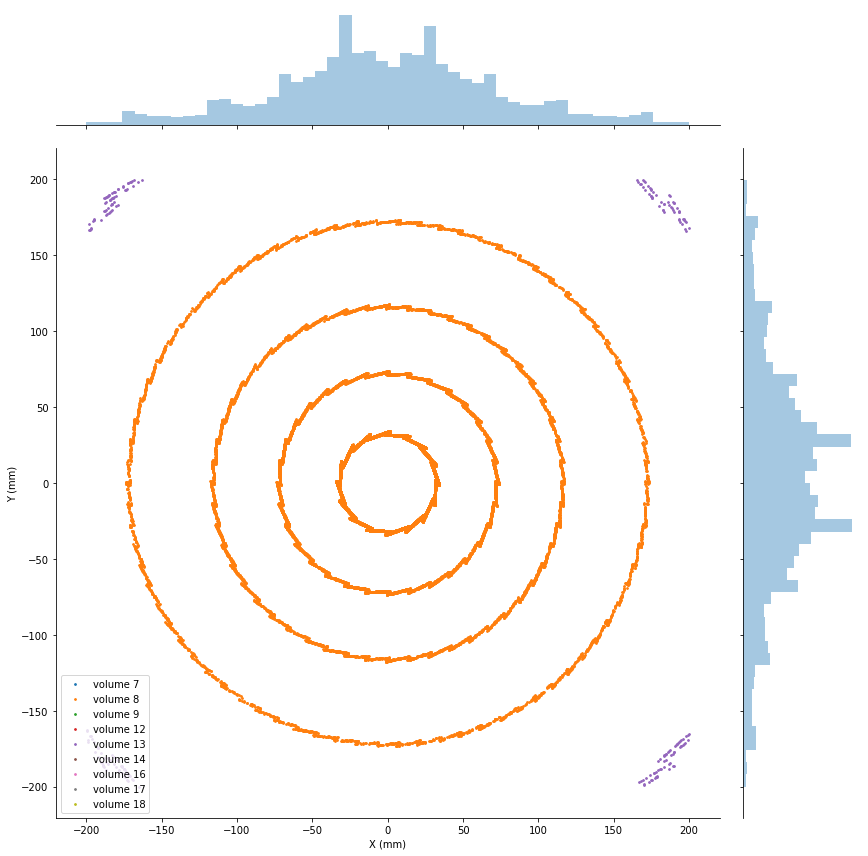

In [51]:
g = sns.jointplot( hits[hits.x.abs()<200].x, hits[hits.y.abs()<200].y, size=12, s=1)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    v = v[v.x.abs()<200]
    v = v[v.y.abs()<200]
    v = v[v.z.abs()<200]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

c:\users\danil\appdata\local\conda\conda\envs\trackml\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


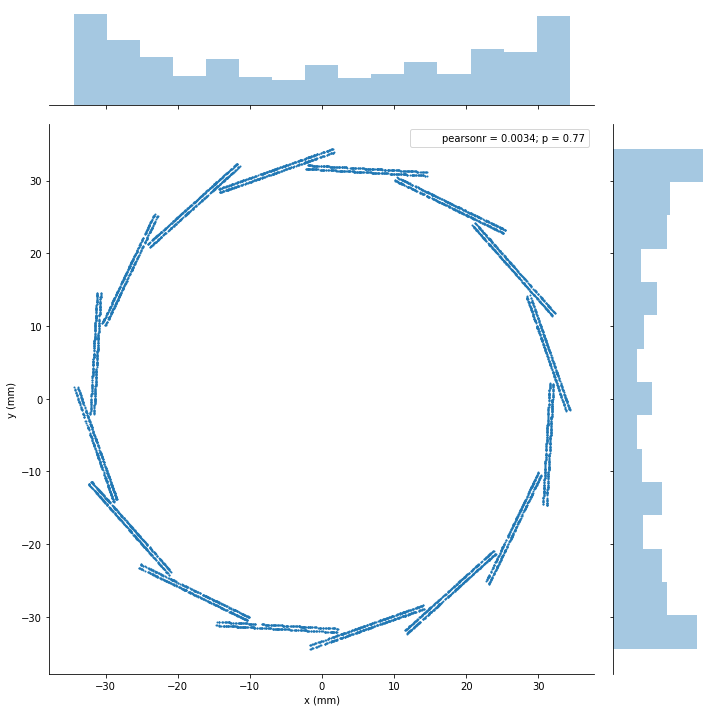

In [53]:
nocap = hits[hits.z.abs()<200]
radialview = sns.jointplot( nocap[nocap.x.abs()<50].x, nocap[nocap.y.abs()<50].y, size=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

### 2. Horizontal Intersection ( z,y )

c:\users\danil\appdata\local\conda\conda\envs\trackml\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


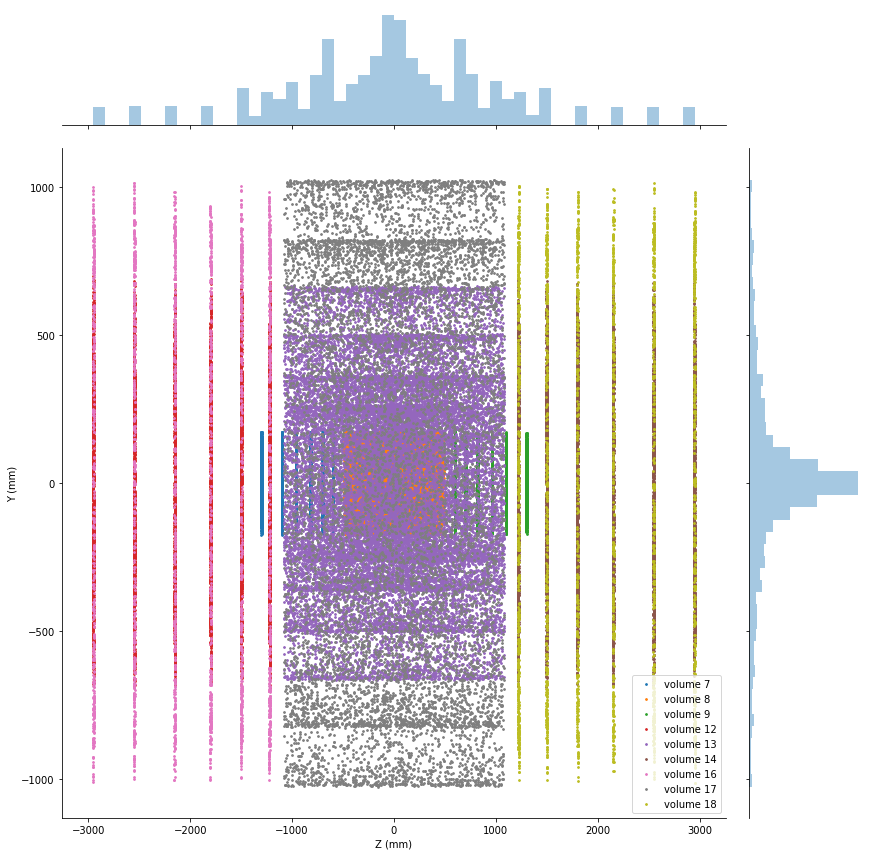

In [32]:
g = sns.jointplot(hits.z, hits.y, s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

### 3. 3d Plot

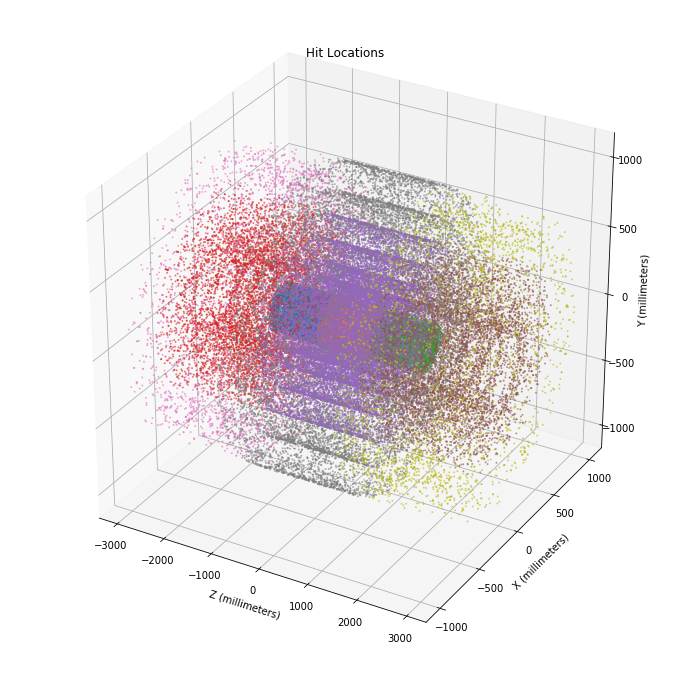

In [27]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=1, label='volume {}'.format(volume), alpha=0.5)
ax.set_title('Hit Locations')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
plt.show()

Particles info
---
The particle data contains each particle's initial position, momentum, and charge, which we can join with the event truth data set to get the particle's final position and momentum.

In [30]:
particles.info()
particles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12263 entries, 0 to 12262
Data columns (total 9 columns):
particle_id    12263 non-null int64
vx             12263 non-null float32
vy             12263 non-null float32
vz             12263 non-null float32
px             12263 non-null float32
py             12263 non-null float32
pz             12263 non-null float32
q              12263 non-null int32
nhits          12263 non-null int32
dtypes: float32(6), int32(2), int64(1)
memory usage: 479.1 KB


,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


### Initial position

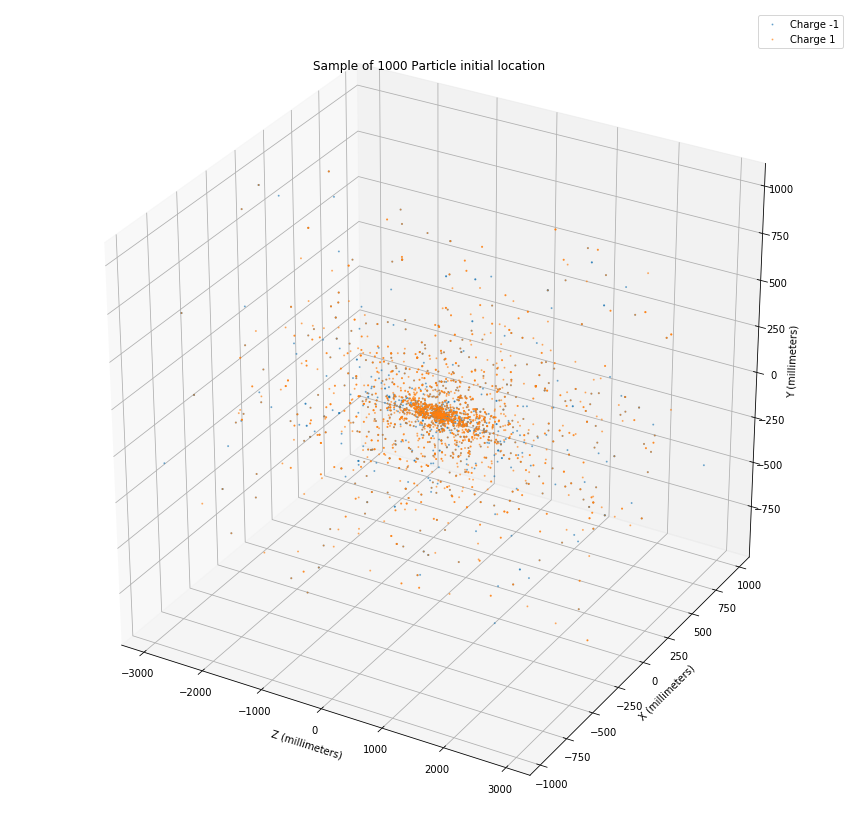

In [57]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
for charge in [-1, 1]:
    q = particles[particles.q == charge]
    ax.scatter(q.vz, q.vx, q.vy, s=1, label='Charge {}'.format(charge), alpha=0.5)
ax.set_title('Sample of 1000 Particle initial location')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
ax.legend()
plt.show()

Particle tracks
---
The mapping between hits and generating particles and the true particle state at each measured hit. Each entry maps one hit to one particle.

In [71]:
truth.info()
truth.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120939 entries, 0 to 120938
Data columns (total 9 columns):
hit_id         120939 non-null int32
particle_id    120939 non-null int64
tx             120939 non-null float32
ty             120939 non-null float32
tz             120939 non-null float32
tpx            120939 non-null float32
tpy            120939 non-null float32
tpz            120939 non-null float32
weight         120939 non-null float32
dtypes: float32(7), int32(1), int64(1)
memory usage: 4.6 MB


,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


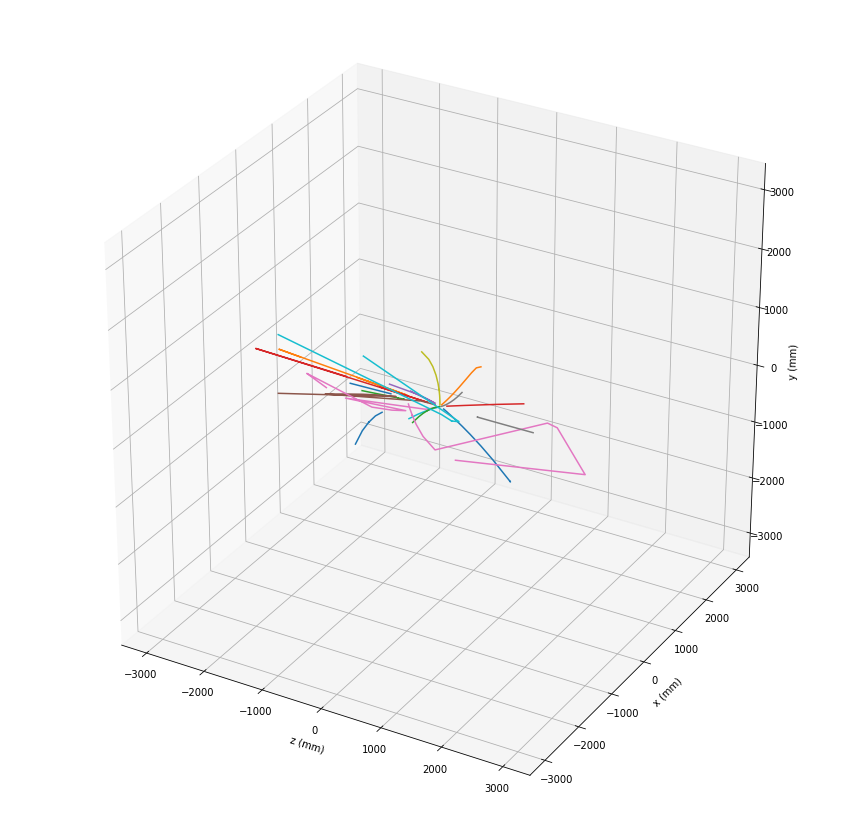

In [79]:
# Get every 100th particle
tracks = truth.particle_id.unique()[1::500]

plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
for track in tracks:
    t = truth[truth.particle_id == track]
    ax.plot3D(t.tz, t.tx, t.ty)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()

In [75]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [76]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


In [77]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3
